# Artificial Intelligence, AI

사람의 지능을 모티브로 한 기술, 4차 산업형멱의 핵심기술
사람처럼 인식, 결심, 행동하는 기술을 구현하는 목적

## 인공지능의 분류

약인공지능 : 특정 분야에 
강인공지능 :


In [ ]:
### 인공지능 
프로그래밍을 구축하거나 인간을 모방하여 장의적으로 문제를 해결할 수 있는 기술을 의미.

In [ ]:
### 머신러닝
명시적 프로그래밍이아닌 데이터를 이용하여 스스로 학습하는 시스템 모델 
회귀, 분류, 군집화 등이 있고 지도, 비지도, 강화학습으로 구분

강화학습 - 게임에서 주로 사용 

In [ ]:
### 딥러닝
머신러닝의 한 종류로서 사람의 뇌 신경망을 모방한 뉴럴 네트워크를 이용하는 모델 

In [ ]:
## 데이터

### 정형데이터

### 비정형 데이터

### 반정형 데이터

In [ ]:
## 알고리즘 

## 계산

### GPU 병렬 처리 능력
### 성능 향상
### AI 전용 처리 장치 개발 

In [ ]:
지도학습
학습단계 : 관찰된 데이터를 통해 최적의 함수를 생성
테스트 단계 : 찾은 함수를 이용하여 결과값을 예측 

비지도학습

강화학습



In [227]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

In [5]:
iris = sns.load_dataset('iris')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# 입력값 X

In [11]:
X = iris.drop('species', axis=1)
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [ ]:
# 결과값 Y

In [13]:
Y = iris['species']
print(Y)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [23]:
rs = np.random.RandomState(30)
x = rs.rand(150) * 10
y = 3 * x + 2 * rs.rand(150)

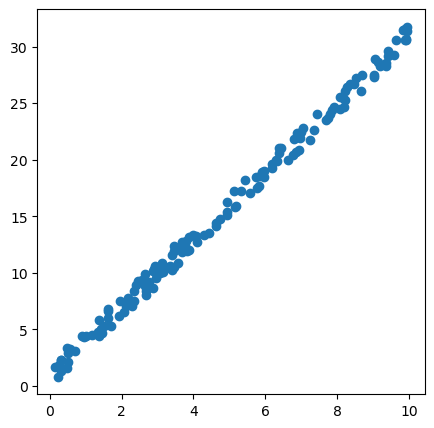

In [29]:
plt.figure(figsize=(5, 5))
plt.scatter(x, y)

In [ ]:
#  선형회귀
# LinearRegression클래스를 이용한 모델 객체 생성 

In [33]:
lr = LinearRegression()

In [41]:
print(x.shape)
print(x.ndim)

(150,)
1


In [45]:
print(X.shape)

(150, 4)


In [93]:
X = x.reshape(-1 ,1) # x의 행의 갯수 : -1 
print(X.shape)


(150, 1)


In [49]:
print(y.shape)

(150,)


In [51]:
lr.fit(X, y)

LinearRegression()

y = ax + b

이미 알고 있는 x, y의 값으로 a, b를 구한다 

a : 기울기, coefficient
b : 절편, intercept 

In [53]:
#  기울기
lr.coef_

array([3.0046231])

In [55]:
#  절편
lr.intercept_

0.9626013911052116

y = 3.0046231 * x  + 0.96...

In [61]:
x_new = np.linspace(-1, 11, num=150)
print(x_new.shape)

(150,)


In [65]:
X_new = x_new.reshape(-1, 1)
X_new.shape

(150, 1)

In [71]:
y_pred = lr.predict(X_new)


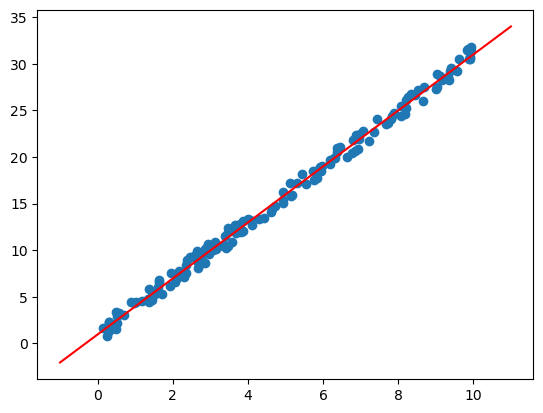

In [81]:
plt.plot(X_new, y_pred, c='red')
plt.scatter(X, y)

In [99]:
#  제곱근오차 
#  min squared error, mse
# rmse 

rmse = np.sqrt(mean_squared_error(y, y_pred))
print(len(y), len(y_pred))

150 150


In [101]:
rmse

13.723465764494868

In [103]:
iris['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [105]:
150 * 0.8

120.0

In [123]:
#  레이블 인코딩 

y = iris['species']
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [129]:
encoder = LabelEncoder()
y = encoder.fit_transform(y)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=45) #  X, y에 대한 train, test 데이터셋 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 1)
(30, 1)
(120,)
(30,)


In [141]:
y_train

array([1, 1, 2, 2, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 2, 0, 0, 1,
       2, 0, 2, 0, 0, 1, 0, 1, 1, 2, 1, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1,
       1, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1,
       1, 2, 2, 2, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 1, 1, 0, 2, 2, 0, 0, 2,
       0, 2, 1, 1, 2, 2, 1, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 1,
       1, 1, 0, 2, 2, 1, 1, 0, 2, 2])

In [149]:
sr = pd.Series(y_train)
sr.value_counts(ascending=False)

1    43
0    39
2    38
Name: count, dtype: int64

In [207]:
iris = load_iris()
type(iris)
X = iris.data
y = iris.target

In [209]:
print(type(X))
print(X.shape)
print(type(y))
print(y.shape)

<class 'numpy.ndarray'>
(150, 4)
<class 'numpy.ndarray'>
(150,)


In [211]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

데이터 5등분
1. 검증 학습 학습 학습 학습
2. 학습 검증 학습 학습 학습
3. 학습 학습 검증 학습 학습
4. 학습 학습 학습 검증 학습
5. 학습 학습 학습 학습 검증

1~5의 평균 
교차 검증(Cross Validatio, CV)

In [271]:
model = KNeighborsClassifier(n_neighbors=10)
scores = cross_val_score(model, X, y, cv=5)

In [273]:
print(scores)

[0.96666667 1.         1.         0.93333333 1.        ]


In [275]:
print(scores.mean())

0.9800000000000001


In [277]:
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
print(scores)
print(scores.mean())
print(scores.sum())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]
0.9733333333333334
146.0


In [279]:
model.fit(X, y)

KNeighborsClassifier(n_neighbors=10)

In [281]:
model.predict([[4.6, 3.1, 1.5, 0.2]])

array([0])

In [283]:
model.predict([[6.2, 3.4, 5.4, 2.3]])

array([2])

In [285]:
model.predict([[-666.2, 3.4, 5.4, 2.3]])

array([0])